Maximum Adjusted Salary: 112000.0
Minimum Adjusted Salary: 35200.0
                Name Department  Salary  Years in Company   Position  \
0           John Doe      Sales   50000                 5    Manager   
1         Jane Smith  Marketing   40000                 3  Executive   
2        Bob Johnson         HR   35000                 2    Analyst   
3        Alice Brown         IT   60000                 7    Manager   
4      Charlie Davis    Finance   70000                10  Executive   
5       David Wilson      Sales   48000                 4    Analyst   
6          Eve Moore  Marketing   45000                 3  Assistant   
7       Frank Taylor         HR   32000                 1  Executive   
8     Grace Anderson         IT   55000                 6    Manager   
9        Hank Thomas    Finance   65000                 8    Analyst   
10       Ivy Jackson      Sales   51000                 5  Assistant   
11        Jack White  Marketing   42000                 3    Manager 

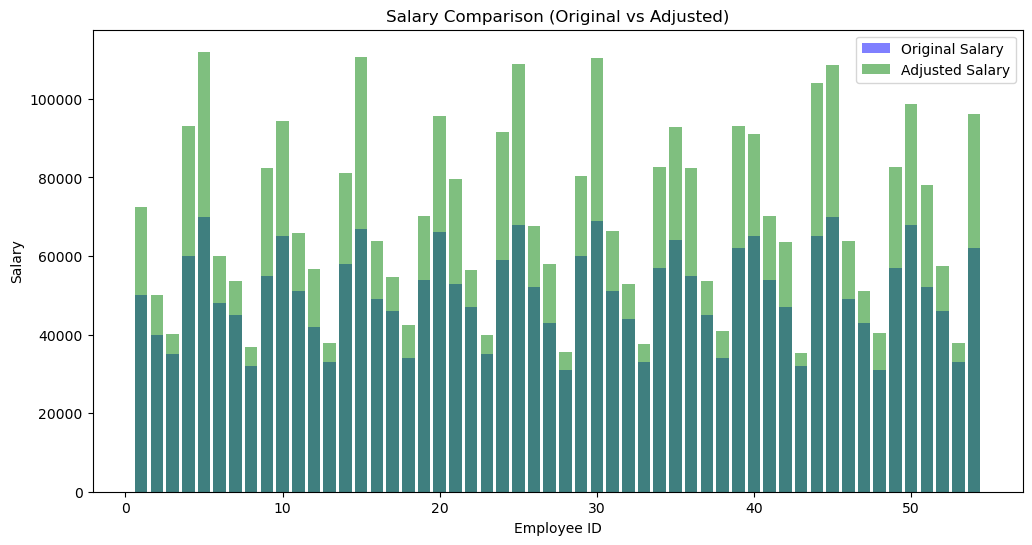

The modified data has been saved to the file: employees_with_adjusted_salaries.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class Employee:
    """
    A class to represent an employee.

    Attributes:
    -----------
    name : str
        Name of the employee.
    department : str
        Department where the employee works.
    salary : float
        Employee's base salary.
    years_in_company : int
        Number of years the employee has been in the company.
    position : str
        Employee's position (e.g., Manager, Executive).

    Methods:
    --------
    calculate_adjusted_salary():
        Calculates the adjusted salary based on years of service and position.
    """

    def __init__(self, name, department, salary, years_in_company, position):
        """
        Initializes an Employee object.

        Parameters:
        -----------
        name : str
            Employee's name.
        department : str
            Employee's department.
        salary : float
            Employee's base salary.
        years_in_company : int
            Years the employee has been with the company.
        position : str
            Employee's position (e.g., Manager, Analyst).
        """
        self.name = name
        self.department = department
        self.salary = salary
        self.years_in_company = years_in_company
        self.position = position

    def calculate_adjusted_salary(self):
        """
        Calculate the adjusted salary for the employee.

        Adjusted salary is computed based on:
        - A yearly bonus of 5% of the salary for each year of service.
        - A position-based bonus:
            - Manager: 20% of the base salary.
            - Executive: 10% of the base salary.
            - Analyst: 5% of the base salary.
            - Assistant: 4% of the base salary.

        Returns:
        --------
        float
            The adjusted salary.
        """
        # Calculate bonus based on years in the company
        years_bonus = self.salary * 0.05 * self.years_in_company

        # Calculate position-based bonus
        position_bonus = 0
        if self.position == 'Manager':
            position_bonus = 0.2 * self.salary
        elif self.position == 'Executive':
            position_bonus = 0.1 * self.salary
        elif self.position == 'Analyst':
            position_bonus = 0.05 * self.salary
        elif self.position == 'Assistant':
            position_bonus = 0.04 * self.salary

        # Return the total adjusted salary
        return self.salary + years_bonus + position_bonus

# Path to the CSV file containing employee data
file_path = 'employees.csv'

# Read the employee data from the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# List to hold Employee objects
employees = []

# Iterate through each row in the DataFrame and create Employee objects
for index, row in data.iterrows():
    emp = Employee(
        name=row['Name'],
        department=row['Department'],
        salary=row['Salary'],
        years_in_company=row['Years in Company'],
        position=row['Position']
    )
    employees.append(emp)  # Add the Employee object to the list

# List to store adjusted salaries
adjusted_salaries = []

# Calculate adjusted salaries for each employee
for emp in employees:
    adjusted_salaries.append(emp.calculate_adjusted_salary())

# Add adjusted salaries and unique employee IDs to the DataFrame
data['Adjusted Salary'] = adjusted_salaries
data['Employee ID'] = range(1, len(data) + 1)

# Find the maximum and minimum adjusted salaries
max_salary = np.max(data['Adjusted Salary'])
min_salary = np.min(data['Adjusted Salary'])

# Print the maximum and minimum adjusted salaries
print(f"Maximum Adjusted Salary: {max_salary}")
print(f"Minimum Adjusted Salary: {min_salary}")

# Print the updated DataFrame
print(data)

# Create a bar chart comparing original and adjusted salaries
plt.figure(figsize=(12, 6))
plt.bar(data['Employee ID'], data['Salary'], alpha=0.5, label='Original Salary', color='blue')
plt.bar(data['Employee ID'], data['Adjusted Salary'], alpha=0.5, label='Adjusted Salary', color='green')

# Add labels and title to the plot
plt.xlabel('Employee ID')
plt.ylabel('Salary')
plt.title('Salary Comparison (Original vs Adjusted)')
plt.legend()

# Save the chart as a PNG file
image_file = 'salary_comparison_chart.png'  # File name for the chart
plt.savefig(image_file, dpi=300, bbox_inches='tight')  # Save the plot with high resolution
print(f"The plot has been saved as: {image_file}")

# Show the bar chart
plt.show()

# Save the updated DataFrame to a new CSV file
output_file = 'employees_with_adjusted_salaries.csv'  # Output file name
data.to_csv(output_file, index=False)  # Save the DataFrame without the index column
print(f"The modified data has been saved to the file: {output_file}")